# MediWatch to assess and anticipate the likelihood of Diabetic patient readmission

## Business Problem

Navigating the intricate landscape of healthcare, the challenge of patient readmission emerges as a critical concern that demands innovative solutions. Patient readmission, or the return of a patient to the hospital shortly after discharge, not only poses a significant financial burden on healthcare systems but also underscores potential gaps in patient care. High rates of readmission often signal unresolved health issues, insufficient post-discharge support, or inadequate coordination among healthcare providers. This recurrent cycle not only impacts the well-being of patients but also places additional strain on healthcare resources. 

Addressing the problem of patient readmission is not merely about reducing costs; it is fundamentally rooted in a commitment to enhancing the overall quality of patient care, ensuring seamless transitions between hospital and home, and ultimately fostering a healthcare system that prioritizes sustained well-being and optimal recovery.


## Technical Problem

MediWatch aims to design a predictive model to assess and anticipate the likelihood of patient readmission.

MediWatch should analyze a myriad of patient-specific factors, such as medical history, demographic information, treatment protocols, post-discharge follow-ups etc. to generate a comprehensive prediction model. The system aims to proactively identify individuals at a higher risk of readmission, allowing healthcare providers to implement targeted interventions and personalized care plans.

In the context of a predictive model like MediWatch, MLOps (Machine Learning Operations) is crucial for several reasons. 
* MLOps ensures the seamless integration of machine learning models into the healthcare workflow. By establishing robust deployment pipelines and monitoring mechanisms, MLOps facilitates the efficient transition of predictive models from development to production, enabling healthcare professionals to leverage these models in real-world scenarios.
* Additionally, MLOps contributes to model performance monitoring and management. In the dynamic healthcare environment, patient conditions and treatment protocols evolve. MLOps enables continuous monitoring of model performance, allowing for timely updates and refinements to ensure the predictive accuracy of the model aligns with the evolving healthcare landscape.

Therefore, this challenge is designed to evaluate your proficiency in the complete Machine Learning (ML) lifecycle, extending beyond conventional model development. In addition to assessing your modeling skills, this problem aims to gauge your understanding and application of MLOps practices throughout the ML workflow.
This holistic evaluation seeks to measure your competency in handling the end-to-end ML process, incorporating MLOps principles to guarantee the model's reliability, scalability, security, and compliance with ethical standards.

## Objectives

* Examine data and conduct feature engineering on datasets related to patient readmission.
* Develop and train machine/deep learning models for forecasting patient readmission.
* Orchestrate model training and optimize hyperparameters using an orchestration system like Airflow. Execute parallel, large-scale experiments with an HPO tool such as RayTune.
* Establish and log all experiments in MLFlow for comprehensive tracking.
* Retrieve the best-performing model and deploy it as a RESTful API endpoint.
* Automate packaging, and deployment processes using CI/CD tools like Jenkins or orchestration tools such as Airflow.
* Implement a model monitoring system using tools like Evidently to detect potential drift.
* Develop orchestration pipelines to retrain and deploy models based on drift detection.
* Please note that the mentioned tools are provided for reference based on the curriculum. Feel free to explore alternative tools that align with the project's goals.
* The dataset can be downloaded from https://www.kaggle.com/datasets/brandao/diabetes. Use the data as per your convenience, splitting into Test/Train, or for simulating data drifts.
 
## Project Details
1. Author's Name: Kashyap Kambhatla, Aaron Nicholson
2. Uplevel Email Address: kashyap3881@gmail.com, aaron-nicholson-ai@gmail.com
3. Name of the Problem Statement of Submission: Capstone Project - MediWatch to assess and anticipate the likelihood of Diabetic patient readmission

## Notebook Usage and distribution
This notebook and the code associated with it is owned by Kashyap K. R. Kambhatla and Aaron Nicholson and should not be used and/or distributed without prior permission from the authors. This project was undertaken as a capstone project for accurately anticipating the likelihood of patient readmission for Diabetic patients and demonstrating complete Machine Learning Operations pipeline through free open-source tools. The authors reserve the rights to demo and publish their observations in publications and outlets of their choice as deemed necessary. 

In [1]:
!pip install pandas==1.4.4
!pip install numpy==1.23.5
!pip install scikit-learn==1.0.2
!pip install lazypredict==0.2.12
!pip install ray
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.20.0 requires pandas>=1.5.0, but you have pandas 1.4.4 which is incompatible.
bigframes 1.27.0 requires pandas>=1.5.3, but you have pandas 1.4.4 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.4.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.4.4 which is incompatible.
ibis-framework 9.2.0 requires pandas<3,>=1.5.3, but you have pandas 1.4.4 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.4.4 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, bu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.27.0 requires pandas>=1.5.3, but you have pandas 1.4.4 which is incompatible.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Mount Google Drive
from google.colab import drive # Used for mounting Google Drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# Set the path to a folder in your Google Drive
data_path = '/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/'
input_data_folder = os.path.join(data_path, 'input_data')

In [ ]:
# cur_dir = os.getcwd()
# input_data_folder = os.path.join(cur_dir, 'input_data')

In [5]:
# Load the dataset into a DataFrame
data_file_path = os.path.join(input_data_folder, 'dataset_diabetes/diabetic_data.csv')
df= pd.read_csv(data_file_path)

In [6]:
# Print top 5 rows
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [7]:
'''
replace all occurrences of the string "?" in the DataFrame df with np.nan (Not a Number),
effectively converting unknown or missing values to NaN for further processing.
'''
df = df.replace("?",np.nan) # python code
# Number of non-integer features
len(df.select_dtypes('O').columns)

37

In [8]:
# Number of integer features
len(df.select_dtypes(np.number).columns)

13

In [9]:
rows = df.shape[0]
cols = df.shape[1]
print('#samples  (rows)    =  {}'.format(rows))
print('#features (columns) =  {}'.format(cols))

#samples  (rows)    =  101766
#features (columns) =  50


In [10]:
# Describe the dataset, considers only numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.00,165201645.62,102640295.98,12522.00,84961194.00,152388987.00,230270887.50,443867222.00
patient_nbr,101766.00,54330400.69,38696359.35,135.00,23413221.00,45505143.00,87545949.75,189502619.00
admission_type_id,101766.00,2.02,1.45,1.00,1.00,1.00,3.00,8.00
discharge_disposition_id,101766.00,3.72,5.28,1.00,1.00,1.00,4.00,28.00
admission_source_id,101766.00,5.75,4.06,1.00,1.00,7.00,7.00,25.00
time_in_hospital,101766.00,4.40,2.99,1.00,2.00,4.00,6.00,14.00
num_lab_procedures,101766.00,43.10,19.67,1.00,31.00,44.00,57.00,132.00
num_procedures,101766.00,1.34,1.71,0.00,0.00,1.00,2.00,6.00
num_medications,101766.00,16.02,8.13,1.00,10.00,15.00,20.00,81.00
number_outpatient,101766.00,0.37,1.27,0.00,0.00,0.00,0.00,42.00


In [11]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

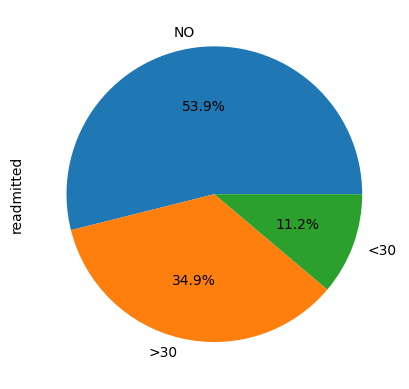

In [12]:
# Distribution of Target Feature readmitted as a pie chart
df['readmitted'].value_counts()/len(df)
counts = df['readmitted'].value_counts()

percentages = counts * 100 / len(df)

fig, ax = plt.subplots()
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.show()

In [13]:
'''
percentage of missing values in each column of a DataFrame df where the number of missing values is greater than 1.
# It does this by first finding the number of missing values in each column using df.isnull().sum(), then filtering
# out the columns with less than 2 missing values using [df.isnull().sum()>1],
# and finally calculating the percentage of missing values by dividing the number of missing values by the total number of rows.
'''
df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

,0
race,2.23
weight,96.86
payer_code,39.56
medical_specialty,49.08
diag_1,0.02
diag_2,0.35
diag_3,1.40


In [14]:
# Drop weight, payer_code and medical_specialty features due to large number of records missing
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [15]:
# Get unique values of readmitted feature
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

0    90409
1    11357
Name: readmitted, dtype: int64


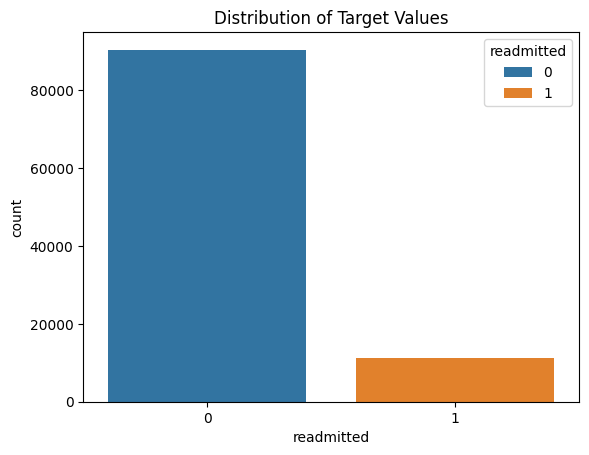

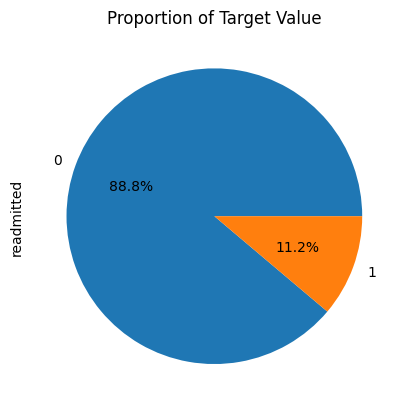

In [16]:
# New target variable mapping to collapse into a binary classification and plotting distribution
df = df.replace({"NO":0,
                    "<30":1,
                    ">30":0})
print(df.readmitted.value_counts())

sns.countplot(x=df.readmitted, hue = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

# Distribution of Target Feature readmitted as a pie chart
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Proportion of Race
Caucasian         76.49
AfricanAmerican   19.31
Hispanic           2.05
Other              1.51
Asian              0.64
Name: race, dtype: float64


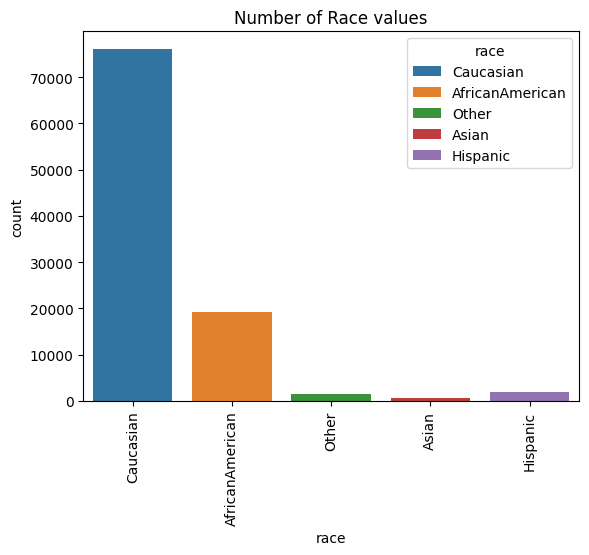

In [17]:
# Distribution of Race
print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)


sns.countplot(x=df.race, hue = "race", data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

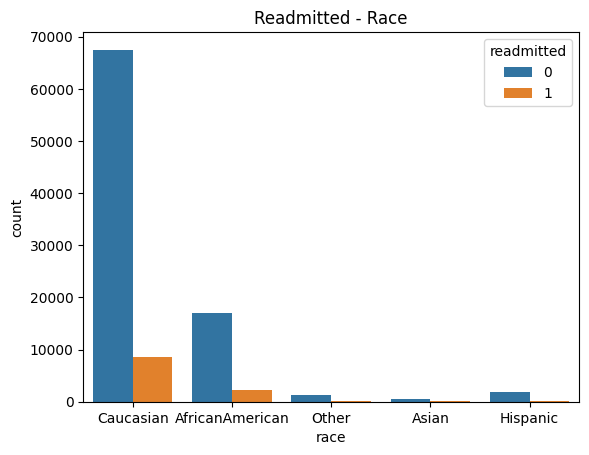

In [18]:
# Distributing the readmitted records among the different races in the dataset.
# Maximum records are for No readmission in Causian, minimum is Asian of which most of them are not readmitted.
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

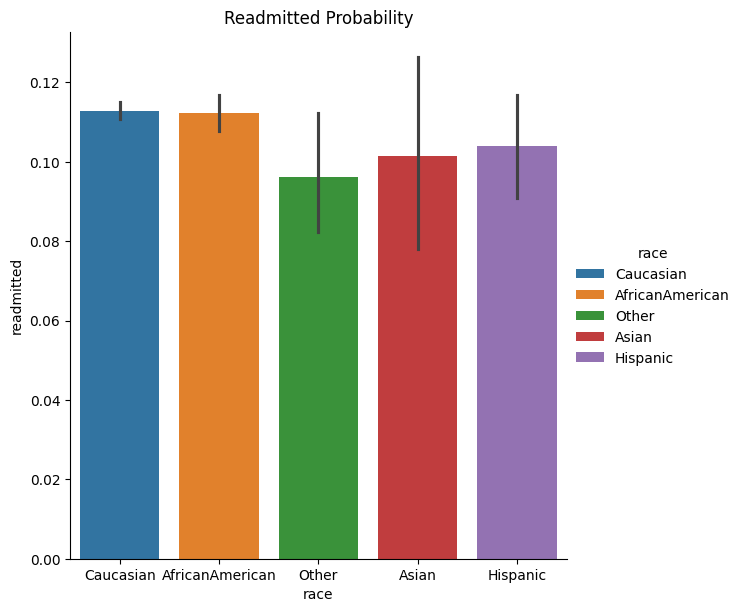

In [19]:
# Proportion of readmission based on race - (number of re-admitted in {race}/total number of records of {race})
sns.catplot(x = "race", y= "readmitted", hue = "race", data = df, kind = "bar", height= 6)
plt.title("Readmitted Probability")
plt.show()

Proportions of Gender Value
Female            0.54
Male              0.46
Unknown/Invalid   0.00
Name: gender, dtype: float64


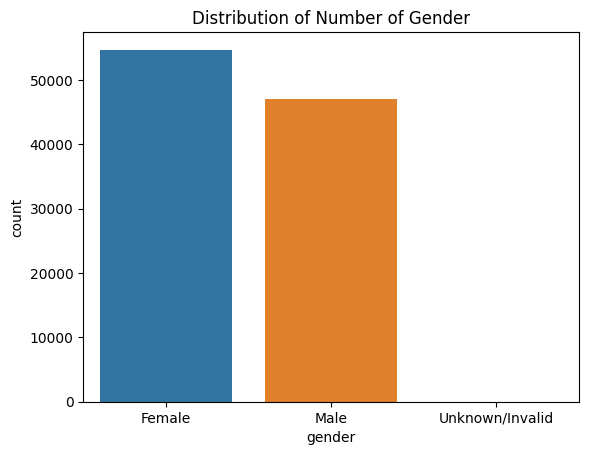

In [20]:
#(number of {gender}/total number of records)
print("Proportions of Gender Value")
print(df.gender.value_counts(normalize = True))

# Distribution of Gender
sns.countplot(x = "gender", hue = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

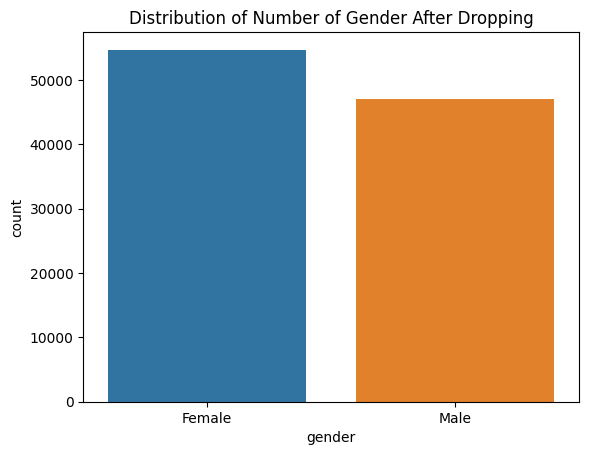

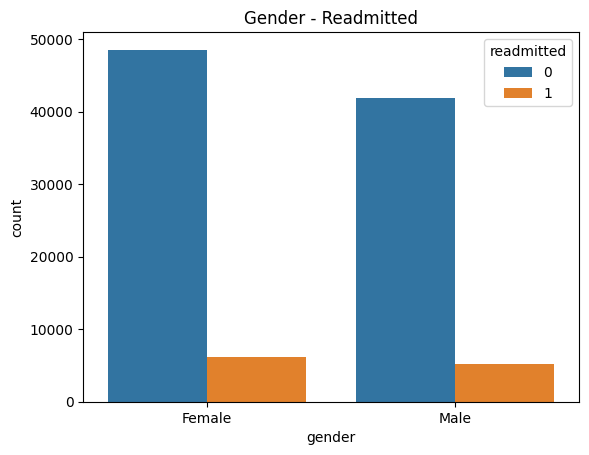

In [21]:
# Drop Unknown/Invalid gender records
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

# Distributing the readmitted records among the different genders in the dataset.
# Maximum records are for No readmission
sns.countplot(x = "gender", hue = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

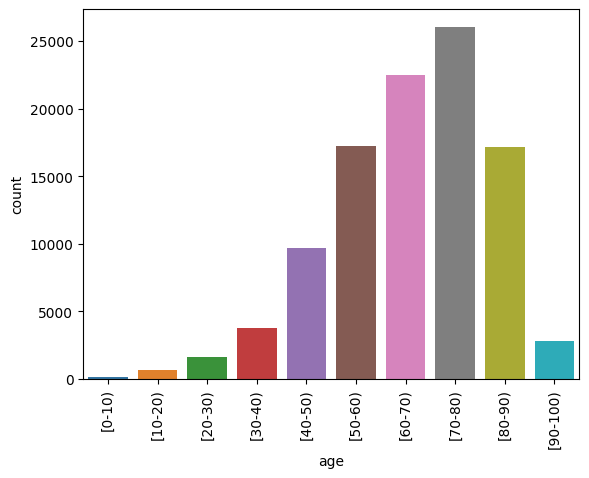

In [22]:
# Distribution of Age groups
sns.countplot(x="age", hue = "age", data = df)
plt.xticks(rotation = 90)
plt.show()

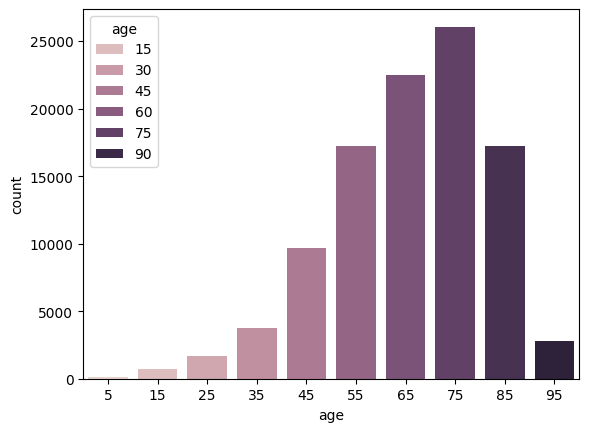

In [23]:
# Collapsing ages groups to specific midpoint values of ages
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", hue="age", data = df)
plt.show()

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


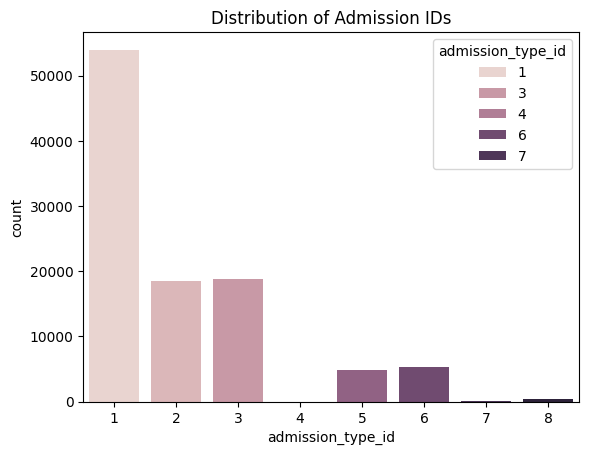

In [24]:
# Distribution of Admission IDs
print("Distribution of ID's")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", hue = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

-Distribution of ID's-
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


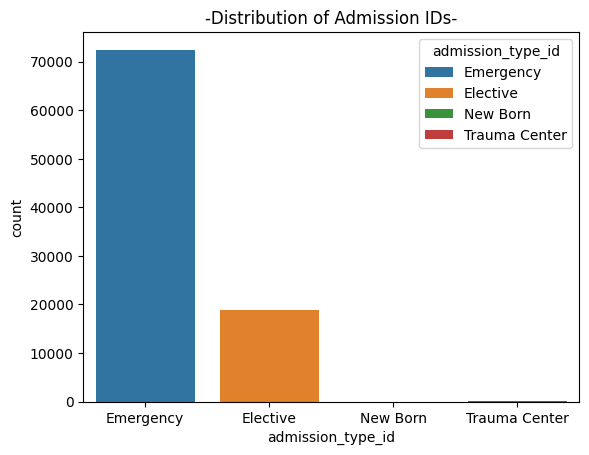

In [25]:
# Collapsing ID to specific categories Emergency, Elective, New Born, and Trauma Center
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

df.admission_type_id = df.admission_type_id.replace(mapped)

print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", hue = "admission_type_id", data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

In [26]:
# Collapsing Discharge disposition IDs to to mainly two categories Discharged to Home and Other
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

In [27]:
df['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


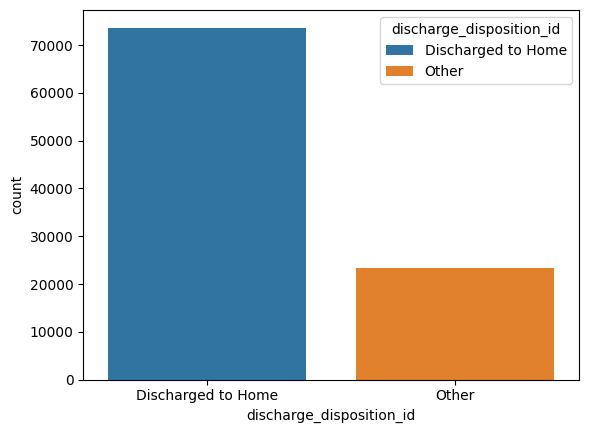

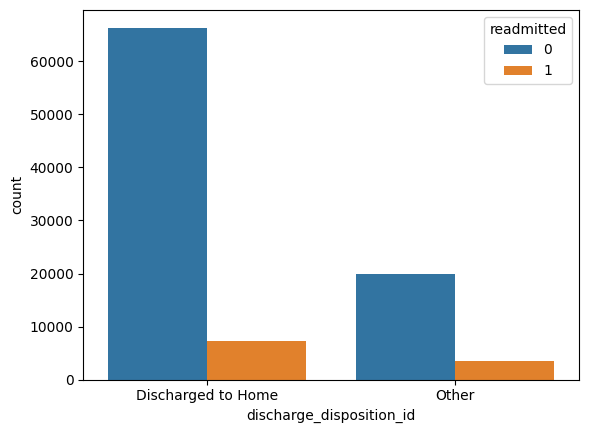

In [28]:
print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

sns.countplot(x ="discharge_disposition_id", hue = "discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

Emergency    57492
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64


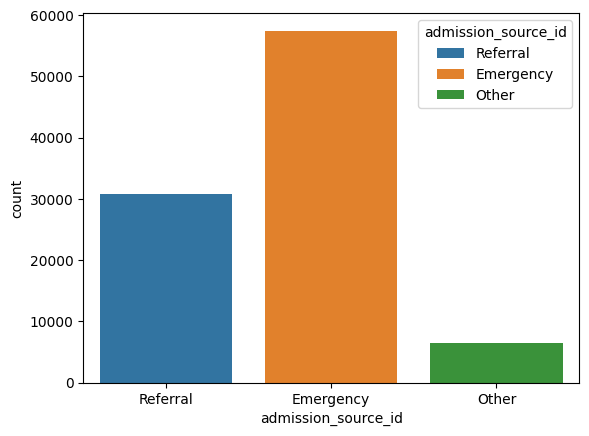

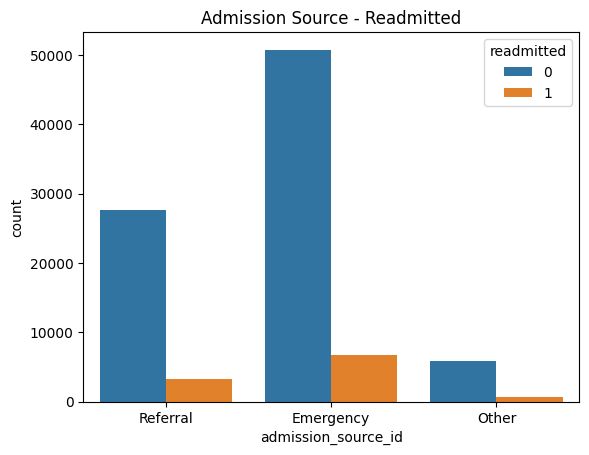

In [29]:
# Collapsing Admission Source IDs to Referral,  Other, and Emergency
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)
print(df.admission_source_id.value_counts())

sns.countplot(x = "admission_source_id", hue = "admission_source_id", data = df)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


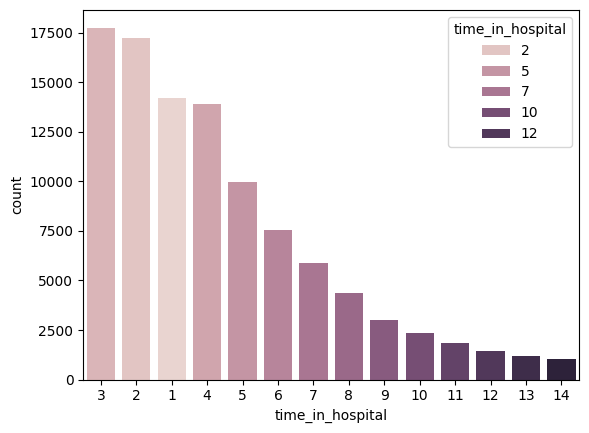

In [30]:
# Distribution of Time in Hospital
print(df.time_in_hospital.value_counts())

sns.countplot(x="time_in_hospital", hue = "time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

In [31]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2271
gender,0
age,0
admission_type_id,10396
discharge_disposition_id,4680
admission_source_id,6942
time_in_hospital,0
num_lab_procedures,0


In [32]:
# Replacing missing values with mode of that feature - Race, admission_type_id, discharge_disposition_id, admission_source_id
df['race'] = df['race'].fillna(df['race'].mode()[0])

df['admission_type_id'] = df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])

df['discharge_disposition_id'] = df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])

df['admission_source_id'] = df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [33]:
# Replacing missing values with mode of that feature - Race, admission_type_id, discharge_disposition_id, admission_source_id
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])

df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])

df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

In [34]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [35]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [36]:
# categorical data
cat_data = df.select_dtypes('O')
#numerical data
num_data = df.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,250.83,276,250,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,276,250.01,255,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,648,250,V27,None,None,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,8,250.43,403,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,197,157,250,None,None,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,250.13,291,458,None,>8,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,560,276,787,None,None,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,38,590,296,None,None,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,996,285,998,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [37]:
num_data

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,2278392,8222157,5,1,41,0,1,0,0,0,1,0
1,149190,55629189,15,3,59,0,18,0,0,0,9,0
2,64410,86047875,25,2,11,5,13,2,0,1,6,0
3,500364,82442376,35,2,44,1,16,0,0,0,7,0
4,16680,42519267,45,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,75,3,51,0,16,0,0,0,9,0
101762,443847782,74694222,85,5,33,3,18,0,0,1,9,0
101763,443854148,41088789,75,1,53,0,9,1,0,0,13,0
101764,443857166,31693671,85,10,45,2,21,0,0,1,9,0


The LabelEncoder in the provided code is used to convert categorical variables into numerical format. Here's what the code is doing:

1. It imports the LabelEncoder from scikit-learn.

2. It creates an instance of LabelEncoder called LE.

3. It then iterates through each column in cat_data (which contains the categorical variables).

4. For each column, it applies the fit_transform method of LabelEncoder:
   - The fit part learns the unique categories in the column.
   - The transform part converts each category to a unique integer.

Specifically, LabelEncoder does the following:

1. It assigns a unique integer to each distinct category in the column.
2. The integers are assigned based on the alphabetical order of the categories.
3. For example, if a column has categories ['cat', 'dog', 'bird'], LabelEncoder might assign:
   'bird' -> 0
   'cat' -> 1
   'dog' -> 2

This encoding is done in-place, meaning the original categorical data in cat_data is replaced with these numerical labels.

It's important to note that while LabelEncoder is simple to use, it has some limitations:
- It assumes an ordinal relationship between categories, which may not always be appropriate.
- It can cause issues if used with algorithms that assume a meaningful numeric relationship between encoded values.

For many machine learning algorithms, especially those that don't assume ordinal relationships, one-hot encoding (using pd.get_dummies() or sklearn's OneHotEncoder) is often a better choice for categorical variables.

In [38]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in cat_data:
  cat_data[i] = LE.fit_transform(cat_data[i])

In [39]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [40]:
# Drop encounter_id and patient_nbr since they are not useful for training
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)


In [41]:
data.head().T

,0,1,2,3,4
age,5,15,25,35,45
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0
number_emergency,0,0,0,0,0
number_inpatient,0,0,1,0,0
number_diagnoses,1,9,6,7,5
readmitted,0,0,0,0,0


In [42]:
# Number of non-integer features
len(df.select_dtypes('O').columns)

35

In [43]:
# Number of integer features
len(df.select_dtypes(np.number).columns)

12

In [44]:
# List all the categorical features of Data
print(df.select_dtypes('O').columns.tolist())
# List all the numerical features of Data
print(df.select_dtypes(np.number).columns.tolist())

['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
['encounter_id', 'patient_nbr', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [45]:
# Compute the accuracy of the model
# from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# def accuracy_report(model,values_list):
#     '''This function will assess model performance. Given a sklearn model it will Predict, and measure performance for both Test and Train Data'''
#     #Train
#     print('Train Data:\n-----------')
#     pred_train = model.predict(X_train_scaled)
#     accuracy_train = accuracy_score(y_train, pred_train)
#     print('Accuracy:', round(accuracy_train,4))
#     print(classification_report(y_train, pred_train, target_names = values_list))
#     roc_plot(model,X_train_scaled,y_train,values_list)

#     print('Test Data:\n----------')
#     pred_test = model.predict(X_test_scaled)
#     accuracy_test = accuracy_score(y_test, pred_test)
#     print('Accuracy:', round(accuracy_test,4))
#     print(classification_report(y_test, pred_test, target_names = values_list))
#     roc_plot(model,X_test_scaled,y_test,values_list)


# def roc_plot(model,X_data,y_data,values_list):
#     y_scores = model.predict_proba(X_data)[:, 1]
#     y_data = y_data.map({values_list[0]:0,values_list[1]:1})
#     fpr, tpr, thresholds = roc_curve(y_data, y_scores)
#     roc_auc = auc(fpr, tpr)
#     plt.figure(figsize=(3, 2))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def accuracy_report(model, values_list):
    '''This function will assess model performance. Given a sklearn model it will Predict, and measure performance for both Test and Train Data'''
    #Train
    print('Train Data:\n-----------')
    pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, pred_train)
    print('Accuracy:', round(accuracy_train,4))
    print(classification_report(y_train, pred_train, target_names=[str(val) for val in values_list]))
    roc_plot(model, X_train_scaled, y_train, values_list)

    print('Test Data:\n----------')
    pred_test = model.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, pred_test)
    print('Accuracy:', round(accuracy_test,4))
    print(classification_report(y_test, pred_test, target_names=[str(val) for val in values_list]))
    roc_plot(model, X_test_scaled, y_test, values_list)

def roc_plot(model, X_data, y_data, values_list):
    y_scores = model.predict_proba(X_data)[:, 1]
    # No need to map y_data if it's already 0 and 1
    fpr, tpr, thresholds = roc_curve(y_data, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(3, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
model_data_folder = os.path.join(data_path, 'model_data')

In [47]:
# Create the input_data folder if it doesn't exist
if not os.path.exists(model_data_folder):
    os.makedirs(model_data_folder)

In [48]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [50]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [51]:
# Save the scaler
import joblib
joblib.dump(SC, os.path.join(model_data_folder, 'nonlazy_standard_scaler.joblib'), compress=('gzip', 3))

['/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/model_data/nonlazy_standard_scaler.joblib']

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81410, 44), (20353, 44), (81410,), (20353,))

In [53]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LR.score(X_train_scaled,y_train)

0.8881709863653113

In [54]:
joblib.dump(LR, os.path.join(model_data_folder, 'LogisticRegression.joblib'), compress=('gzip', 3))

['/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/model_data/LogisticRegression.joblib']

In [55]:
LR.score(X_test_scaled,y_test)

0.8883211320198496

Train Data:
-----------
Accuracy: 0.8882
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     72306
           1       0.50      0.02      0.03      9104

    accuracy                           0.89     81410
   macro avg       0.69      0.51      0.49     81410
weighted avg       0.85      0.89      0.84     81410



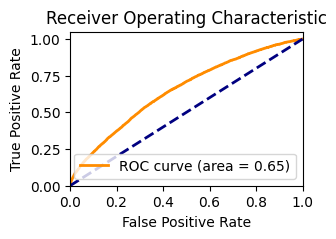

Test Data:
----------
Accuracy: 0.8883
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.38      0.01      0.03      2253

    accuracy                           0.89     20353
   macro avg       0.64      0.51      0.48     20353
weighted avg       0.83      0.89      0.84     20353



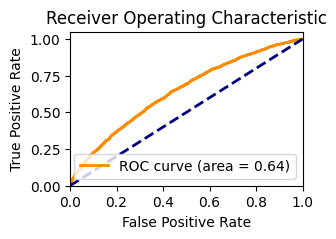

In [56]:
accuracy_report(LR,[0,1])

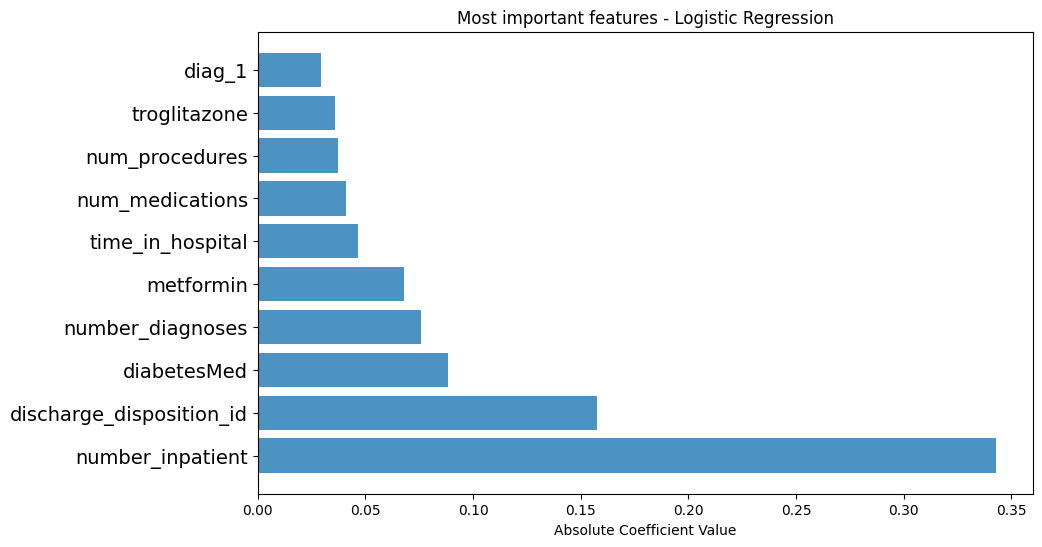

In [57]:
# Linear Regression Feature Importance
lr_coef = np.abs(LR.coef_[0])
lr_feature_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': lr_coef})
lr_feature_importance = lr_feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(range(len(lr_feature_importance)), lr_feature_importance['Importance'], align='center', alpha=0.8)
plt.yticks(range(len(lr_feature_importance)), lr_feature_importance['Feature'], fontsize=14)
plt.xlabel('Absolute Coefficient Value')
plt.title('Most important features - Logistic Regression')
plt.show()

In [58]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RF.score(X_train_scaled,y_train)

0.9999385824837244

In [59]:
joblib.dump(RF, os.path.join(model_data_folder, 'RandomForestClassifier.joblib'), compress=('gzip', 3))

['/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/model_data/RandomForestClassifier.joblib']

In [60]:
RF.score(X_test_scaled,y_test)

0.8890581241094679

In [61]:
y_pred = RF.predict(X_test)

In [62]:
confusion_matrix(y_test,y_pred)

array([[16658,  1442],
       [ 1968,   285]])

In [63]:
accuracy_score(y_test,y_pred)

0.8324571316267873

Train Data:
-----------
Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72306
           1       1.00      1.00      1.00      9104

    accuracy                           1.00     81410
   macro avg       1.00      1.00      1.00     81410
weighted avg       1.00      1.00      1.00     81410



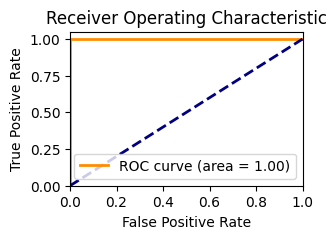

Test Data:
----------
Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.45      0.01      0.02      2253

    accuracy                           0.89     20353
   macro avg       0.67      0.50      0.48     20353
weighted avg       0.84      0.89      0.84     20353



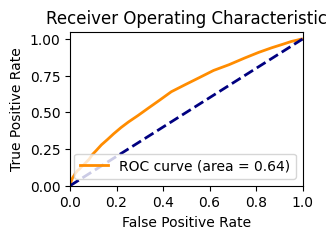

In [64]:
accuracy_report(RF,[0,1])

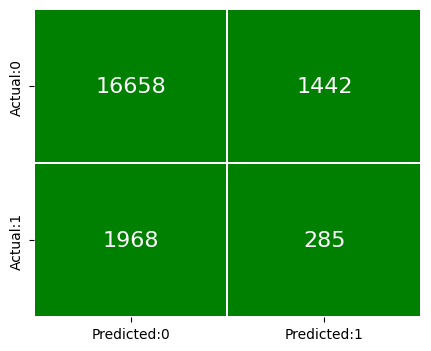

In [65]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['Green'], cbar = False,
                linewidths = 0.1, annot_kws = {'size':16})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

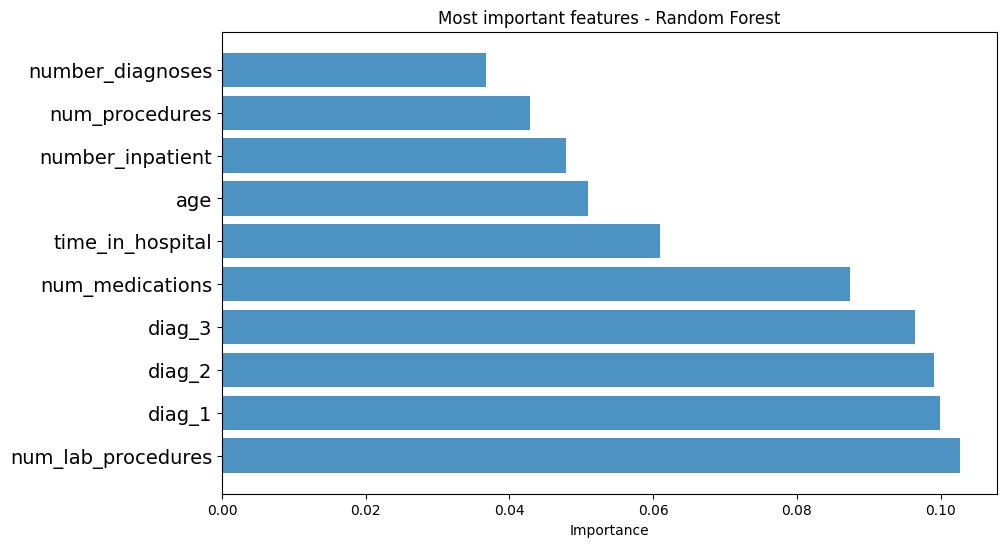

In [66]:
# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': RF.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(range(len(rf_feature_importance)), rf_feature_importance['Importance'], align='center', alpha=0.8)
plt.yticks(range(len(rf_feature_importance)), rf_feature_importance['Feature'], fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [67]:
# Decision Tree Classifier-----------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [68]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2028,1636,3664
1,257,198,455
All,2285,1834,4119


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

In [70]:
print("Accuracy is {0:.2f}".format(accuracy_dtree))
print("Precision is {0:.2f}".format(precision_dtree))
print("Recall is {0:.2f}".format(recall_dtree))

Accuracy is 0.56
Precision is 0.15
Recall is 0.61


               Feature  Importance
8     number_diagnoses        0.03
3       num_procedures        0.03
0                  age        0.04
7     number_inpatient        0.06
1     time_in_hospital        0.06
4      num_medications        0.10
16              diag_3        0.11
15              diag_2        0.11
14              diag_1        0.11
2   num_lab_procedures        0.12


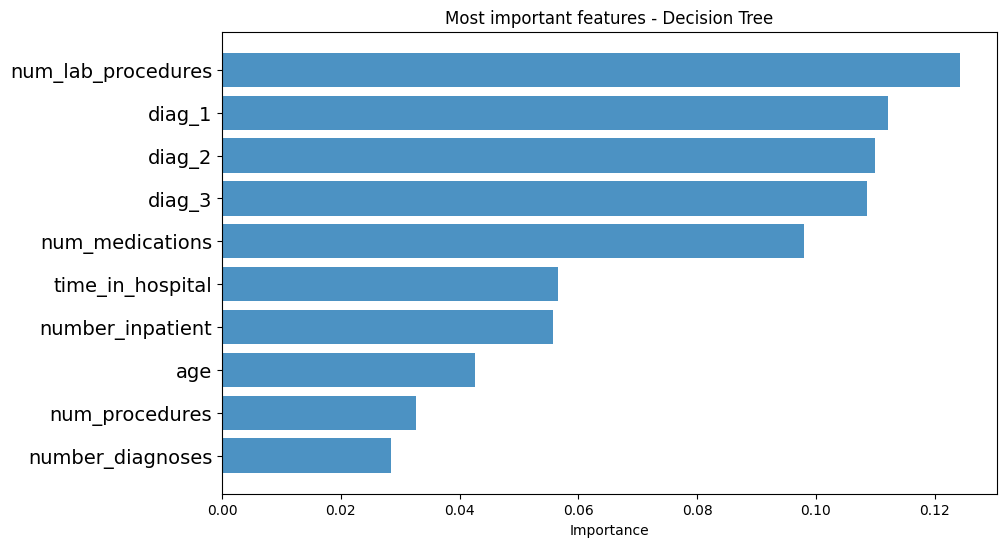

In [71]:
# Create list of top most features based on importance
feature_names = X_train_scaled.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

Train Data:
-----------
Accuracy: 0.9393
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     72306
           1       0.83      0.57      0.68      9104

    accuracy                           0.94     81410
   macro avg       0.89      0.78      0.82     81410
weighted avg       0.94      0.94      0.93     81410



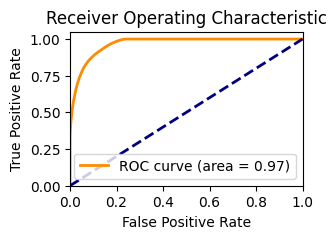

Test Data:
----------
Accuracy: 0.8312
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18100
           1       0.17      0.13      0.15      2253

    accuracy                           0.83     20353
   macro avg       0.53      0.52      0.53     20353
weighted avg       0.81      0.83      0.82     20353



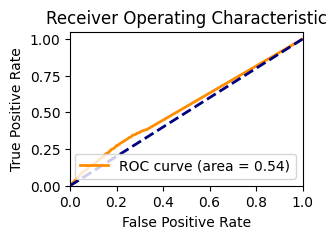

In [72]:
accuracy_report(dtree,[0,1])

## Using Lazy Predict

In [85]:
data['readmitted'].unique()

array([0, 1])

In [86]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=20000, stratify=y, random_state=42)

# Split the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, stratify=y_sampled, random_state=42)



In [87]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [88]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
model_dict = clf.provide_models(X_train_scaled, X_test_scaled, y_train, y_test)

 97%|█████████▋| 28/29 [01:43<00:05,  5.02s/it]

[LightGBM] [Info] Number of positive: 1786, number of negative: 14214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111625 -> initscore=-2.074249
[LightGBM] [Info] Start training from score -2.074249


100%|██████████| 29/29 [01:43<00:00,  3.58s/it]


In [89]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.65,0.60,0.60,0.72,0.05
LabelPropagation,0.82,0.53,0.53,0.82,15.62
LabelSpreading,0.82,0.53,0.53,0.82,25.21
DecisionTreeClassifier,0.80,0.52,0.52,0.80,0.25
Perceptron,0.79,0.52,0.52,0.80,0.10
XGBClassifier,0.89,0.52,0.52,0.84,0.43
LinearDiscriminantAnalysis,0.89,0.52,0.52,0.84,0.41
BaggingClassifier,0.88,0.51,0.51,0.84,1.51
KNeighborsClassifier,0.88,0.51,0.51,0.84,1.92


In [90]:
model_dict['RandomForestClassifier'].score(X_test_scaled, y_test)

0.8885

In [91]:
model_dict['AdaBoostClassifier'].score(X_test_scaled, y_test)

0.88775

In [92]:
# Compute the accuracy of the model
# from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# def accuracy_report(model,values_list):
#     '''This function will assess model performance. Given a sklearn model it will Predict, and measure performance for both Test and Train Data'''
#     #Train
#     print('Train Data:\n-----------')
#     pred_train = model.predict(X_train_scaled)
#     accuracy_train = accuracy_score(y_train, pred_train)
#     print('Accuracy:', round(accuracy_train,4))
#     print(classification_report(y_train, pred_train, target_names = values_list))
#     roc_plot(model,X_train_scaled,y_train,values_list)

#     print('Test Data:\n----------')
#     pred_test = model.predict(X_test_scaled)
#     accuracy_test = accuracy_score(y_test, pred_test)
#     print('Accuracy:', round(accuracy_test,4))
#     print(classification_report(y_test, pred_test, target_names = values_list))
#     roc_plot(model,X_test_scaled,y_test,values_list)


# def roc_plot(model,X_data,y_data,values_list):
#     y_scores = model.predict_proba(X_data)[:, 1]
#     y_data = y_data.map({values_list[0]:0,values_list[1]:1})
#     fpr, tpr, thresholds = roc_curve(y_data, y_scores)
#     roc_auc = auc(fpr, tpr)
#     plt.figure(figsize=(3, 2))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def accuracy_report(model, values_list):
    '''This function will assess model performance. Given a sklearn model it will Predict, and measure performance for both Test and Train Data'''
    #Train
    print('Train Data:\n-----------')
    pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, pred_train)
    print('Accuracy:', round(accuracy_train,4))
    print(classification_report(y_train, pred_train, target_names=[str(val) for val in values_list]))
    roc_plot(model, X_train_scaled, y_train, values_list)

    print('Test Data:\n----------')
    pred_test = model.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, pred_test)
    print('Accuracy:', round(accuracy_test,4))
    print(classification_report(y_test, pred_test, target_names=[str(val) for val in values_list]))
    roc_plot(model, X_test_scaled, y_test, values_list)

def roc_plot(model, X_data, y_data, values_list):
    y_scores = model.predict_proba(X_data)[:, 1]
    # No need to map y_data if it's already 0 and 1
    fpr, tpr, thresholds = roc_curve(y_data, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(3, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [93]:
# Save the scaler
import joblib
joblib.dump(SC, os.path.join(model_data_folder, 'lazy_standard_scaler.joblib'), compress=('gzip', 3))

['/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/model_data/lazy_standard_scaler.joblib']

In [94]:
joblib.dump(model_dict['RandomForestClassifier'], os.path.join(model_data_folder, 'lazy_RandomForestClassifier.joblib'), compress=('gzip', 3))
joblib.dump(model_dict['AdaBoostClassifier'], os.path.join(model_data_folder, 'lazy_AdaBoostClassifier.joblib'), compress=('gzip', 3))

['/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/model_data/lazy_AdaBoostClassifier.joblib']

Train Data:
-----------
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       1.00      1.00      1.00      1786

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



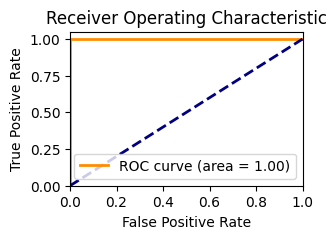

Test Data:
----------
Accuracy: 0.8885
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3554
           1       0.50      0.00      0.01       446

    accuracy                           0.89      4000
   macro avg       0.69      0.50      0.47      4000
weighted avg       0.85      0.89      0.84      4000



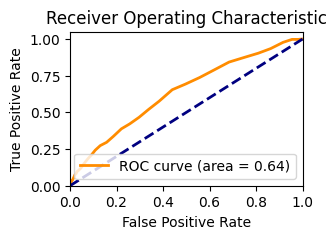

In [95]:
accuracy_report(model_dict['RandomForestClassifier'],[0, 1])

Train Data:
-----------
Accuracy: 0.8892
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14214
           1       0.72      0.01      0.02      1786

    accuracy                           0.89     16000
   macro avg       0.81      0.51      0.48     16000
weighted avg       0.87      0.89      0.84     16000



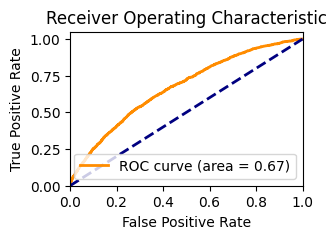

Test Data:
----------
Accuracy: 0.8878
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3554
           1       0.36      0.01      0.02       446

    accuracy                           0.89      4000
   macro avg       0.63      0.50      0.48      4000
weighted avg       0.83      0.89      0.84      4000



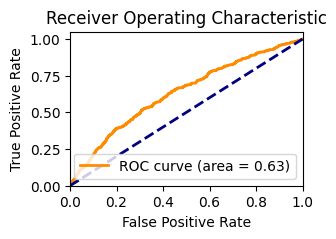

In [96]:
accuracy_report(model_dict['AdaBoostClassifier'],[0, 1])

In [99]:
# def plot_feature_importance(model, X, model_name):
#     feature_importance = model.feature_importances_
#     feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
#     feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).head(10)

#     plt.figure(figsize=(10,6))
#     plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center', alpha=0.8)
#     plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'], fontsize=14)
#     plt.xlabel('Importance')
#     plt.title(f'Top 10 Most Important Features - {model_name}')
#     plt.tight_layout()
#     plt.show()

def plot_feature_importance(pipeline, X, model_name):
    # Get the actual model from the pipeline
    model = pipeline.named_steps['classifier']

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance = np.abs(model.coef_[0])
    else:
        print(f"Model {model_name} doesn't have feature_importances_ or coef_ attribute")
        return

    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).head(10)

    plt.figure(figsize=(10,6))
    plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center', alpha=0.8)
    plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'], fontsize=14)
    plt.xlabel('Importance')
    plt.title(f'Top 10 Most Important Features - {model_name}')
    plt.tight_layout()
    plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

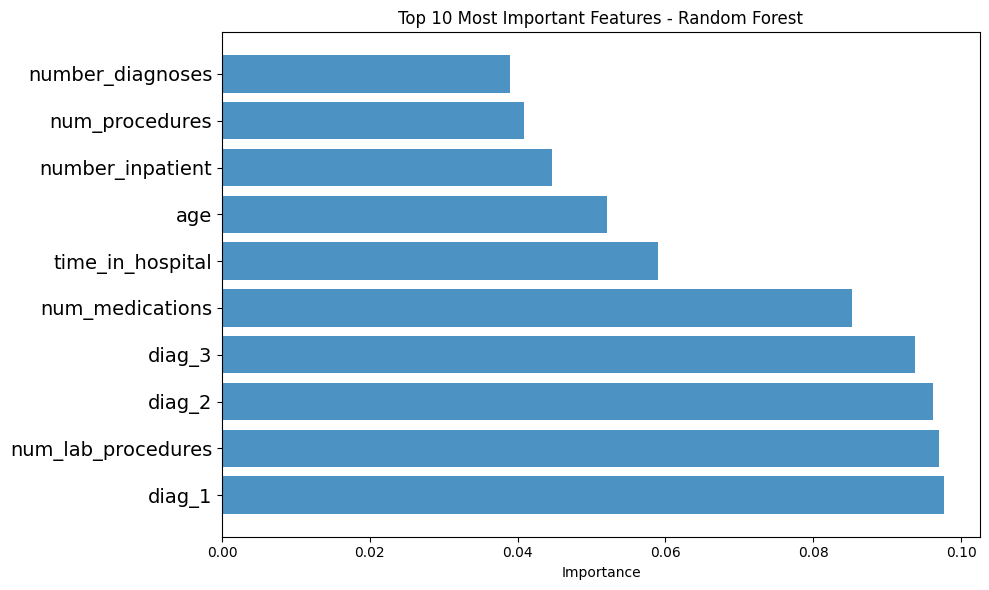

In [103]:
# # Plot feature importance for RandomForestClassifier
# plot_feature_importance(model_dict['RandomForestClassifier'], X_train_scaled, 'Random Forest')
# Plot feature importance for RandomForestClassifier
if isinstance(model_dict['RandomForestClassifier'].named_steps['classifier'], RandomForestClassifier):
    plot_feature_importance(model_dict['RandomForestClassifier'], X_train_scaled, 'Random Forest')
else:
    print("The classifier in the pipeline is not a RandomForestClassifier")

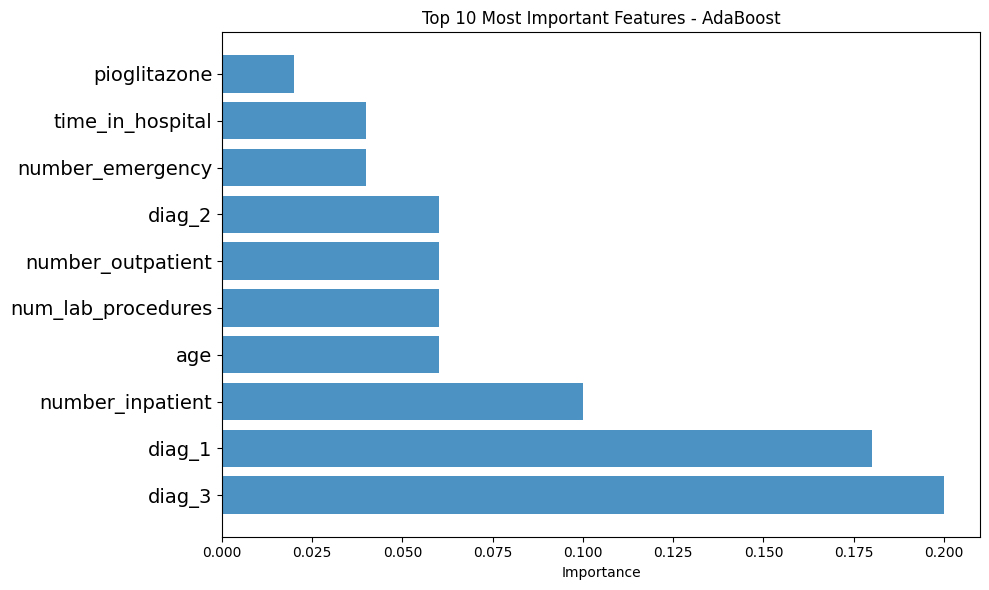

In [104]:
# # Plot feature importance for AdaBoostClassifier
# plot_feature_importance(model_dict['AdaBoostClassifier'], X_train_scaled, 'AdaBoost')
# Plot feature importance for AdaBoostClassifier
if isinstance(model_dict['AdaBoostClassifier'].named_steps['classifier'], AdaBoostClassifier):
    plot_feature_importance(model_dict['AdaBoostClassifier'], X_train_scaled, 'AdaBoost')
else:
    print("The classifier in the pipeline is not an AdaBoostClassifier")

## Optimizing through Ray Tune

In [73]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import ray
from ray import tune
from ray.tune.search.optuna import OptunaSearch

In [74]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [76]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [77]:
def train_logistic_regression(config):
    lr = LogisticRegression(**config)
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return {"accuracy": accuracy}

In [78]:
# Logistic Regression hyperparameter tuning
lr_search_space = {
    "C": tune.loguniform(1e-4, 1e4),
    "penalty": tune.choice(['l1', 'l2']),
    "solver": tune.choice(['liblinear', 'saga'])
}

lr_tuner = tune.Tuner(
    train_logistic_regression,
    param_space=lr_search_space,
    tune_config=tune.TuneConfig(
        metric="accuracy",
        mode="max",
        search_alg=OptunaSearch(),
        num_samples=50
    )
)

lr_results = lr_tuner.fit()
best_lr_config = lr_results.get_best_result().config


2024-12-01 03:47:34,082	INFO worker.py:1819 -- Started a local Ray instance.
2024-12-01 03:47:37,516	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
[I 2024-12-01 03:47:38,750] A new study created in memory with name: optuna
2024-12-01 03:47:38,756	INFO tensorboardx.py:193 -- pip install "ray[tune]" to see TensorBoard files.
2024-12-01 03:47:38,763	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+----------------------------------------------------------------------------------+
| Configuration for experiment     train_logistic_regression_2024-12-01_03-47-31   |
+----------------------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                                 |
| Scheduler                        FIFOScheduler                                   |
| Number of trials                 50                                              |
+----------------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_logistic_regression_2024-12-01_03-47-31

Trial status: 1 PENDING
Current time: 2024-12-01 03:47:40. Total running time: 1s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------+
| Trial name                           status           C   penalty     solver   |
+-------------------

(train_logistic_regression pid=12004) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12004)   warnings.warn(



Trial train_logistic_regression_4cd9919f started with configuration:
+-------------------------------------------------------------+
| Trial train_logistic_regression_4cd9919f config             |
+-------------------------------------------------------------+
| C                                                   0.73234 |
| penalty                                                  l1 |
| solver                                                 saga |
+-------------------------------------------------------------+

Trial status: 2 TERMINATED | 2 RUNNING | 1 PENDING
Current time: 2024-12-01 03:48:10. Total running time: 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 3c6092cc with accuracy=0.8883211320198496 and params={'C': 3987.149996416495, 'penalty': 'l2', 'solver': 'saga'}
+--------------------------------------------------------------------------------------------------------------------------------+
| Trial name                           status                 

(train_logistic_regression pid=12162) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12162)   warnings.warn(



Trial train_logistic_regression_5240637e started with configuration:
+---------------------------------------------------------------+
| Trial train_logistic_regression_5240637e config               |
+---------------------------------------------------------------+
| C                                                     36.4404 |
| penalty                                                    l1 |
| solver                                              liblinear |
+---------------------------------------------------------------+

Trial train_logistic_regression_5240637e completed after 1 iterations at 2024-12-01 03:48:23. Total running time: 44s
+-------------------------------------------------------------+
| Trial train_logistic_regression_5240637e result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    1.13879 |
| time_total_s               

(train_logistic_regression pid=12277) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12277)   warnings.warn(



Trial train_logistic_regression_aa49fac4 started with configuration:
+--------------------------------------------------------------+
| Trial train_logistic_regression_aa49fac4 config              |
+--------------------------------------------------------------+
| C                                                   38.22294 |
| penalty                                                   l2 |
| solver                                                  saga |
+--------------------------------------------------------------+

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-12-01 03:48:40. Total running time: 1min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 3c6092cc with accuracy=0.8883211320198496 and params={'C': 3987.149996416495, 'penalty': 'l2', 'solver': 'saga'}
+-----------------------------------------------------------------------------------------------------------------------------------+
| Trial name                           status   

(train_logistic_regression pid=12493) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12493)   warnings.warn(



Trial train_logistic_regression_fb0e52e1 started with configuration:
+---------------------------------------------------------------+
| Trial train_logistic_regression_fb0e52e1 config               |
+---------------------------------------------------------------+
| C                                                    17.55007 |
| penalty                                                    l1 |
| solver                                              liblinear |
+---------------------------------------------------------------+

Trial train_logistic_regression_fb0e52e1 completed after 1 iterations at 2024-12-01 03:48:59. Total running time: 1min 20s
+-------------------------------------------------------------+
| Trial train_logistic_regression_fb0e52e1 result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    0.92998 |
| time_total_s          

(train_logistic_regression pid=12792) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12792)   warnings.warn(



Trial train_logistic_regression_f0dbafc4 completed after 1 iterations at 2024-12-01 03:49:28. Total running time: 1min 49s
+-------------------------------------------------------------+
| Trial train_logistic_regression_f0dbafc4 result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    17.8095 |
| time_total_s                                        17.8095 |
| training_iteration                                        1 |
| accuracy                                            0.88832 |
+-------------------------------------------------------------+

Trial train_logistic_regression_808cdf7c started with configuration:
+--------------------------------------------------------------+
| Trial train_logistic_regression_808cdf7c config              |
+--------------------------------------------------------------+
| C                                

(train_logistic_regression pid=12843) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12843)   warnings.warn(



Trial train_logistic_regression_10305f79 started with configuration:
+---------------------------------------------------------------+
| Trial train_logistic_regression_10305f79 config               |
+---------------------------------------------------------------+
| C                                                     0.00013 |
| penalty                                                    l1 |
| solver                                              liblinear |
+---------------------------------------------------------------+

Trial train_logistic_regression_10305f79 completed after 1 iterations at 2024-12-01 03:49:35. Total running time: 1min 56s
+-------------------------------------------------------------+
| Trial train_logistic_regression_10305f79 result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    0.96502 |
| time_total_s          

(train_logistic_regression pid=12984) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=12984)   warnings.warn(



Trial train_logistic_regression_808cdf7c completed after 1 iterations at 2024-12-01 03:49:48. Total running time: 2min 9s
+-------------------------------------------------------------+
| Trial train_logistic_regression_808cdf7c result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    19.8867 |
| time_total_s                                        19.8867 |
| training_iteration                                        1 |
| accuracy                                            0.88832 |
+-------------------------------------------------------------+

Trial train_logistic_regression_db2247a0 started with configuration:
+---------------------------------------------------------------+
| Trial train_logistic_regression_db2247a0 config               |
+---------------------------------------------------------------+
| C                              

(train_logistic_regression pid=14877) /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
(train_logistic_regression pid=14877)   warnings.warn(



Trial train_logistic_regression_263f0ab0 started with configuration:
+---------------------------------------------------------------+
| Trial train_logistic_regression_263f0ab0 config               |
+---------------------------------------------------------------+
| C                                                      0.0001 |
| penalty                                                    l1 |
| solver                                              liblinear |
+---------------------------------------------------------------+

Trial train_logistic_regression_263f0ab0 completed after 1 iterations at 2024-12-01 03:52:30. Total running time: 4min 51s
+-------------------------------------------------------------+
| Trial train_logistic_regression_263f0ab0 result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    0.46603 |
| time_total_s          

2024-12-01 03:52:52,561	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_logistic_regression_2024-12-01_03-47-31' in 0.0511s.



Trial train_logistic_regression_a0c0c7b5 completed after 1 iterations at 2024-12-01 03:52:52. Total running time: 5min 13s
+-------------------------------------------------------------+
| Trial train_logistic_regression_a0c0c7b5 result             |
+-------------------------------------------------------------+
| checkpoint_dir_name                                         |
| time_this_iter_s                                    0.76383 |
| time_total_s                                        0.76383 |
| training_iteration                                        1 |
| accuracy                                            0.88832 |
+-------------------------------------------------------------+

Trial status: 50 TERMINATED
Current time: 2024-12-01 03:52:52. Total running time: 5min 13s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 10305f79 with accuracy=0.8893037881393406 and params={'C': 0.0001302698874002854, 'penalty': 'l1', 'solver': 'liblinear'}
+-------------------

In [79]:
# Train models with best configurations
best_lr = LogisticRegression(**best_lr_config)
best_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.0001302698874002854, penalty='l1', solver='liblinear')

In [80]:
# Compare accuracies
print("Original Logistic Regression Accuracy:", LR.score(X_test_scaled, y_test))
print("Tuned Logistic Regression Accuracy:", best_lr.score(X_test_scaled, y_test))

Original Logistic Regression Accuracy: 0.8883211320198496
Tuned Logistic Regression Accuracy: 0.8893037881393406


### Using Ray Tune did not help the accuracy.

In [81]:
def train_random_forest(config):
    rf = RandomForestClassifier(**config)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return {"accuracy": accuracy}

In [82]:
# Random Forest hyperparameter tuning
rf_search_space = {
    "n_estimators": tune.randint(10, 500),
    "max_depth": tune.randint(1, 20),
    "min_samples_split": tune.randint(2, 20),
    "min_samples_leaf": tune.randint(1, 20)
}

rf_tuner = tune.Tuner(
    train_random_forest,
    param_space=rf_search_space,
    tune_config=tune.TuneConfig(
        metric="accuracy",
        mode="max",
        search_alg=OptunaSearch(),
        num_samples=50
    )
)

rf_results = rf_tuner.fit()
best_rf_config = rf_results.get_best_result().config

[I 2024-12-01 04:29:33,310] A new study created in memory with name: optuna
2024-12-01 04:29:33,315	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+----------------------------------------------------------------------------+
| Configuration for experiment     train_random_forest_2024-12-01_04-29-32   |
+----------------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                           |
| Scheduler                        FIFOScheduler                             |
| Number of trials                 50                                        |
+----------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_random_forest_2024-12-01_04-29-32
(raylet) Warning: The actor ImplicitFunc is very large (36 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.

Trial status: 1 PENDING
Current time: 2024-12-01 04:29:35. Total running time: 1s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+-------

2024-12-01 04:47:00,606	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_random_forest_2024-12-01_04-29-32' in 0.0372s.



Trial train_random_forest_1a002325 completed after 1 iterations at 2024-12-01 04:47:00. Total running time: 17min 27s
+------------------------------------------------------+
| Trial train_random_forest_1a002325 result            |
+------------------------------------------------------+
| checkpoint_dir_name                                  |
| time_this_iter_s                              24.028 |
| time_total_s                                  24.028 |
| training_iteration                                 1 |
| accuracy                                      0.8893 |
+------------------------------------------------------+

Trial status: 50 TERMINATED
Current time: 2024-12-01 04:47:00. Total running time: 17min 27s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: dc0821e6 with accuracy=0.8894020537512898 and params={'n_estimators': 84, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 7}
+----------------------------------------------------------------------

In [83]:
best_rf = RandomForestClassifier(**best_rf_config)
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=9,
                       n_estimators=84)

In [84]:
print("Original Random Forest Accuracy:", RF.score(X_test_scaled, y_test))
print("Tuned Random Forest Accuracy:", best_rf.score(X_test_scaled, y_test))

Original Random Forest Accuracy: 0.8890581241094679
Tuned Random Forest Accuracy: 0.8891072569154425
